# 获取比特币价格

In [9]:
########## GEMINI 行情接口 ##########
## https://api.gemini.com/v1/pubticker/:symbol

import json
import requests

gemini_ticker = 'https://api.gemini.com/v1/pubticker/{}'
symbol = 'btcusd'
btc_data = requests.get(gemini_ticker.format(symbol)).json()
print(json.dumps(btc_data, indent=4))


{
    "ask": "10050.74",
    "bid": "10050.73",
    "volume": {
        "USD": "39720786.6637087744270000000000000000047129192",
        "timestamp": 1565833500000,
        "BTC": "3877.6822714415"
    },
    "last": "10050.74"
}


              CloseTime  OpenPrice  HighPrice  LowPrice  ClosePrice  \
0   2019-08-13 01:42:00   11407.23   11407.26  11406.05    11406.05   
1   2019-08-13 01:45:00   11406.05   11406.05  11390.63    11399.51   
2   2019-08-13 01:48:00   11412.36   11412.36  11411.84    11412.22   
3   2019-08-13 01:51:00   11407.93   11411.34  11391.35    11411.34   
4   2019-08-13 01:54:00   11396.26   11399.03  11396.26    11399.03   
5   2019-08-13 01:57:00   11393.57   11403.83  11393.57    11403.83   
6   2019-08-13 02:00:00   11403.82   11403.82  11399.41    11399.41   
7   2019-08-13 02:03:00   11396.47   11416.39  11396.47    11416.39   
8   2019-08-13 02:06:00   11405.80   11406.18  11405.06    11406.18   
9   2019-08-13 02:09:00   11404.40   11408.70  11404.40    11408.70   
10  2019-08-13 02:12:00   11409.25   11414.38  11409.25    11410.72   
11  2019-08-13 02:15:00   11407.94   11407.94  11407.94    11407.94   
12  2019-08-13 02:18:00   11408.01   11408.01  11408.00    11408.01   
13  20

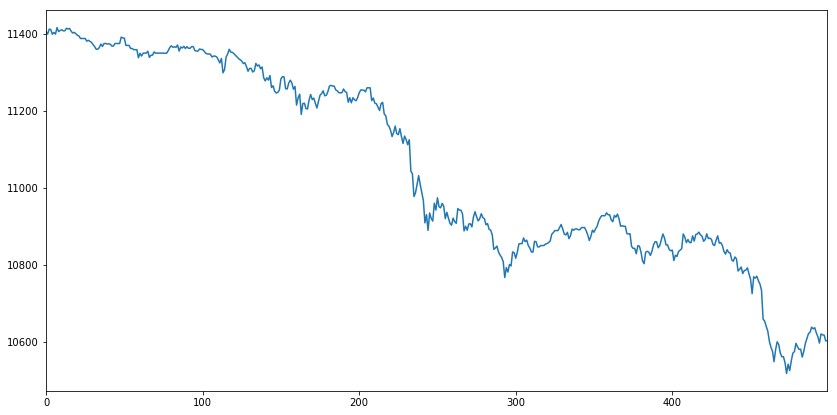

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time, datetime
%matplotlib inline
# 选择要获取的数据时间段
periods = '180'

# 通过 Http 抓取 btc 历史价格数据
resp = requests.get('https://api.cryptowat.ch/markets/gemini/btcusd/ohlc', 
  params={
    'periods': periods
  })
data = resp.json()
# 转换成 pandas data frame
df = pd.DataFrame(
  data['result'][periods], 
  columns=[
    'CloseTime',
    'OpenPrice',
    'HighPrice',
    'LowPrice',
    'ClosePrice',
    'Volume',
    'NA'])
df.CloseTime = df.CloseTime.apply(datetime.datetime.utcfromtimestamp)
# 输出 DataFrame 的头部几行
print(df.head(130))
print(df.info())

# 绘制 btc 价格曲线
df['ClosePrice'].plot(figsize=(14, 7))

In [16]:
import requests
import json
import base64
import hmac
import hashlib
import datetime
import time

base_url = "https://api.sandbox.gemini.com"
endpoint = "/v1/order/new"
url = base_url + endpoint

gemini_api_key = "account-zmidXEwP72yLSSybXVvn"
gemini_api_secret = "375b97HfE7E4tL8YaP3SJ239Pky9".encode()

t = datetime.datetime.now()
payload_nonce = str(int(time.mktime(t.timetuple())*1000))

payload = {
   "request": "/v1/order/new",
   "nonce": payload_nonce,
   "symbol": "btcusd",
   "amount": "5",
   "price": "3633.00",
   "side": "buy",
   "type": "exchange limit",
   "options": ["maker-or-cancel"]
}

encoded_payload = json.dumps(payload).encode()
b64 = base64.b64encode(encoded_payload)
signature = hmac.new(gemini_api_secret, b64, hashlib.sha384).hexdigest()

request_headers = {
    'Content-Type': "text/plain",
    'Content-Length': "0",
    'X-GEMINI-APIKEY': gemini_api_key,
    'X-GEMINI-PAYLOAD': b64,
    'X-GEMINI-SIGNATURE': signature,
    'Cache-Control': "no-cache"
}

response = requests.post(url,
                         data=None,
                         headers=request_headers)

new_order = response.json()
print(new_order)


{'result': 'error', 'message': "Failed to place buy order on symbol 'BTCUSD' for price $3,633.00 and quantity 5 BTC due to insufficient funds", 'reason': 'InsufficientFunds'}


# 测试时延

In [18]:
import requests
import timeit


def get_orderbook():
  orderbook = requests.get("https://api.gemini.com/v1/book/btcusd").json()


n = 10
latency = timeit.timeit('get_orderbook()', setup='from __main__ import get_orderbook', number=n) * 1.0 / n
print('Latency is {} ms'.format(latency * 1000))

###### 输出 #######
#美国服务器
#Latency is 196.67642089999663 ms


Latency is 1580.3818866959773 ms


# websocket

In [5]:
#一次握手 永久通信
import websocket
#import thread
import _thread as thread
# 在接收到服务器发送消息时调用
import time
def on_message(ws, message):
    print('Received: ' + message)

# 在和服务器建立完成连接时调用   
def on_open(ws):
    # 线程运行函数
    def gao():
        # 往服务器依次发送 0-4，每次发送完休息 0.1 秒
        for i in range(5):
            time.sleep(0.01)
            msg="{0}".format(i)
            ws.send(msg)
            print('Sent: ' + msg)
        # 休息 1 秒用于接受服务器回复的消息
        time.sleep(1)
        
        # 关闭 Websocket 的连接
        ws.close()
        print("Websocket closed")
    
    # 在另一个线程运行 gao() 函数
    thread.start_new_thread(gao, ())


if __name__ == "__main__":
    ws = websocket.WebSocketApp("ws://echo.websocket.org/",
                              on_message = on_message,
                              on_open = on_open)
    
    ws.run_forever()
'''
#### 输出 #####
Sent: 0
Sent: 1
Received: 0
Sent: 2
Received: 1
Sent: 3
Received: 2
Sent: 4
Received: 3
Received: 4
Websocket closed
'''

Sent: 0
Sent: 1
Sent: 2
Sent: 3
Sent: 4
Received: 0
Received: 1
Received: 2
Received: 3
Received: 4


'\n#### 输出 #####\nSent: 0\nSent: 1\nReceived: 0\nSent: 2\nReceived: 1\nSent: 3\nReceived: 2\nSent: 4\nReceived: 3\nReceived: 4\nWebsocket closed\n'

Websocket closed


# 委托账单


In [7]:
import ssl
import websocket
import json

# 全局计数器
count = 5

def on_message(ws, message):
    global count
    print(message)
    count -= 1
    # 接收了 5 次消息之后关闭 websocket 连接
    if count == 0:
        ws.close()

if __name__ == "__main__":
    ws = websocket.WebSocketApp(
        "wss://api.gemini.com/v1/marketdata/btcusd?top_of_book=true&offers=true",
        on_message=on_message)
    ws.run_forever(sslopt={"cert_reqs": ssl.CERT_NONE})

# ###### 输出 #######
# {"type":"update","eventId":7275473603,"socket_sequence":0,"events":[{"type":"change","reason":"initial","price":"11386.12","delta":"1.307","remaining":"1.307","side":"ask"}]}
# {"type":"update","eventId":7275475120,"timestamp":1562380981,"timestampms":1562380981991,"socket_sequence":1,"events":[{"type":"change","side":"ask","price":"11386.62","remaining":"1","reason":"top-of-book"}]}
# {"type":"update","eventId":7275475271,"timestamp":1562380982,"timestampms":1562380982387,"socket_sequence":2,"events":[{"type":"change","side":"ask","price":"11386.12","remaining":"1.3148","reason":"top-of-book"}]}
# {"type":"update","eventId":7275475838,"timestamp":1562380986,"timestampms":1562380986270,"socket_sequence":3,"events":[{"type":"change","side":"ask","price":"11387.16","remaining":"0.072949","reason":"top-of-book"}]}
# {"type":"update","eventId":7275475935,"timestamp":1562380986,"timestampms":1562380986767,"socket_sequence":4,"events":[{"type":"change","side":"ask","price":"11389.22","remaining":"0.06204196","reason":"top-of-book"}]}


{"type":"update","eventId":7770820277,"socket_sequence":0,"events":[{"type":"change","reason":"initial","price":"10601.91","delta":"2","remaining":"2","side":"ask"}]}
{"type":"update","eventId":7770821814,"timestamp":1565755195,"timestampms":1565755195475,"socket_sequence":1,"events":[{"type":"change","side":"ask","price":"10601.91","remaining":"1.99277236","reason":"top-of-book"}]}
{"type":"update","eventId":7770822121,"timestamp":1565755198,"timestampms":1565755198255,"socket_sequence":2,"events":[{"type":"change","side":"ask","price":"10602.76","remaining":"6.70420697","reason":"top-of-book"}]}
{"type":"update","eventId":7770822203,"timestamp":1565755198,"timestampms":1565755198547,"socket_sequence":3,"events":[{"type":"change","side":"ask","price":"10602.66","remaining":"0.152","reason":"top-of-book"}]}
{"type":"update","eventId":7770822217,"timestamp":1565755198,"timestampms":1565755198585,"socket_sequence":4,"events":[{"type":"change","side":"ask","price":"10602.76","remaining":"

# 行情抓取模块

In [8]:
import copy
import json
import ssl
import time
import websocket


class OrderBook(object):

    BIDS = 'bid'
    ASKS = 'ask'

    def __init__(self, limit=20):

        self.limit = limit

        # (price, amount)
        self.bids = {}
        self.asks = {}

        self.bids_sorted = []
        self.asks_sorted = []

    def insert(self, price, amount, direction):
        if direction == self.BIDS:
            if amount == 0:
                if price in self.bids:
                    del self.bids[price]
            else:
                self.bids[price] = amount
        elif direction == self.ASKS:
            if amount == 0:
                if price in self.asks:
                    del self.asks[price]
            else:
                self.asks[price] = amount
        else:
            print('WARNING: unknown direction {}'.format(direction))

    def sort_and_truncate(self):
        # sort
        self.bids_sorted = sorted([(price, amount) for price, amount in self.bids.items()], reverse=True)
        self.asks_sorted = sorted([(price, amount) for price, amount in self.asks.items()])

        # truncate
        self.bids_sorted = self.bids_sorted[:self.limit]
        self.asks_sorted = self.asks_sorted[:self.limit]

        # copy back to bids and asks
        self.bids = dict(self.bids_sorted)
        self.asks = dict(self.asks_sorted)

    def get_copy_of_bids_and_asks(self):
        return copy.deepcopy(self.bids_sorted), copy.deepcopy(self.asks_sorted)


class Crawler:
    def __init__(self, symbol, output_file):
        self.orderbook = OrderBook(limit=10)
        self.output_file = output_file

        self.ws = websocket.WebSocketApp('wss://api.gemini.com/v1/marketdata/{}'.format(symbol),
                                         on_message = lambda ws, message: self.on_message(message))
        self.ws.run_forever(sslopt={'cert_reqs': ssl.CERT_NONE})

    def on_message(self, message):
        # 对收到的信息进行处理，然后送给 orderbook
        data = json.loads(message)
        for event in data['events']:
            price, amount, direction = float(event['price']), float(event['remaining']), event['side']
            self.orderbook.insert(price, amount, direction)

        # 整理 orderbook，排序，只选取我们需要的前几个
        self.orderbook.sort_and_truncate()

        # 输出到文件
        with open(self.output_file, 'a+') as f:
            bids, asks = self.orderbook.get_copy_of_bids_and_asks()
            output = {
                'bids': bids,
                'asks': asks,
                'ts': int(time.time() * 1000)
            }
            f.write(json.dumps(output) + '\n')


if __name__ == '__main__':
    crawler = Crawler(symbol='BTCUSD', output_file='BTCUSD.txt')

# ###### 输出 #######

# {"bids": [[11398.73, 0.96304843], [11398.72, 0.98914437], [11397.32, 1.0], [11396.13, 2.0], [11395.95, 2.0], [11395.87, 1.0], [11394.09, 0.11803397], [11394.08, 1.0], [11393.59, 0.1612581], [11392.96, 1.0]], "asks": [[11407.42, 1.30814001], [11407.92, 1.0], [11409.48, 2.0], [11409.66, 2.0], [11412.15, 0.525], [11412.42, 1.0], [11413.77, 0.11803397], [11413.99, 0.5], [11414.28, 1.0], [11414.72, 1.0]], "ts": 1562558996535}
# {"bids": [[11398.73, 0.96304843], [11398.72, 0.98914437], [11397.32, 1.0], [11396.13, 2.0], [11395.95, 2.0], [11395.87, 1.0], [11394.09, 0.11803397], [11394.08, 1.0], [11393.59, 0.1612581], [11392.96, 1.0]], "asks": [[11407.42, 1.30814001], [11407.92, 1.0], [11409.48, 2.0], [11409.66, 2.0], [11412.15, 0.525], [11412.42, 1.0], [11413.77, 0.11803397], [11413.99, 0.5], [11414.28, 1.0], [11414.72, 1.0]], "ts": 1562558997377}
# {"bids": [[11398.73, 0.96304843], [11398.72, 0.98914437], [11397.32, 1.0], [11396.13, 2.0], [11395.95, 2.0], [11395.87, 1.0], [11394.09, 0.11803397], [11394.08, 1.0], [11393.59, 0.1612581], [11392.96, 1.0]], "asks": [[11407.42, 1.30814001], [11409.48, 2.0], [11409.66, 2.0], [11412.15, 0.525], [11412.42, 1.0], [11413.77, 0.11803397], [11413.99, 0.5], [11414.28, 1.0], [11414.72, 1.0]], "ts": 1562558997765}
# {"bids": [[11398.73, 0.96304843], [11398.72, 0.98914437], [11397.32, 1.0], [11396.13, 2.0], [11395.95, 2.0], [11395.87, 1.0], [11394.09, 0.11803397], [11394.08, 1.0], [11393.59, 0.1612581], [11392.96, 1.0]], "asks": [[11407.42, 1.30814001], [11409.48, 2.0], [11409.66, 2.0], [11412.15, 0.525], [11413.77, 0.11803397], [11413.99, 0.5], [11414.28, 1.0], [11414.72, 1.0]], "ts": 1562558998638}
# {"bids": [[11398.73, 0.97131753], [11398.72, 0.98914437], [11397.32, 1.0], [11396.13, 2.0], [11395.95, 2.0], [11395.87, 1.0], [11394.09, 0.11803397], [11394.08, 1.0], [11393.59, 0.1612581], [11392.96, 1.0]], "asks": [[11407.42, 1.30814001], [11409.48, 2.0], [11409.66, 2.0], [11412.15, 0.525], [11413.77, 0.11803397], [11413.99, 0.5], [11414.28, 1.0], [11414.72, 1.0]], "ts": 1562558998645}
# {"bids": [[11398.73, 0.97131753], [11398.72, 0.98914437], [11397.32, 1.0], [11396.13, 2.0], [11395.87, 1.0], [11394.09, 0.11803397], [11394.08, 1.0], [11393.59, 0.1612581], [11392.96, 1.0]], "asks": [[11407.42, 1.30814001], [11409.48, 2.0], [11409.66, 2.0], [11412.15, 0.525], [11413.77, 0.11803397], [11413.99, 0.5], [11414.28, 1.0], [11414.72, 1.0]], "ts": 1562558998748}
